In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
# logistic regression
from sklearn.linear_model import LogisticRegression
# support vector machine
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# classification report
from sklearn.metrics import classification_report

df_sample1 = pd.read_csv('data_ml/SharedResponses_sample1.csv')
df_sample2 = pd.read_csv('data_ml/SharedResponses_sample2.csv')

df_combined = pd.read_csv('data_ml/SharedResponses_combined_two_genders.csv')
df_female = pd.read_csv('data_ml/SharedResponses_female.csv')
df_male = pd.read_csv('data_ml/SharedResponses_male.csv')

In [6]:
df_list = [df_sample1, df_sample2, df_combined, df_female, df_male]

for df in df_list:
    df.dropna(inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1029 entries, 0 to 1231
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ResponseID               1029 non-null   object 
 1   ExtendedSessionID        1029 non-null   object 
 2   UserID                   1029 non-null   int64  
 3   ScenarioOrder            1029 non-null   int64  
 4   Intervention             1029 non-null   int64  
 5   PedPed                   1029 non-null   int64  
 6   Barrier                  1029 non-null   int64  
 7   CrossingSignal           1029 non-null   int64  
 8   AttributeLevel           1029 non-null   object 
 9   ScenarioTypeStrict       1029 non-null   object 
 10  ScenarioType             1029 non-null   object 
 11  DefaultChoice            1029 non-null   object 
 12  NonDefaultChoice         1029 non-null   object 
 13  DefaultChoiceIsOmission  1029 non-null   float64
 14  NumberOfCharacters       1029

In [9]:
i = 1

for df in df_list:

    print('the {}th dataset'.format(i))

    df_x = df.iloc[:, 3:-2]
    df_y = df['Saved']
    df_x = df_x.drop(['Saved'], axis=1)
    df_x = df_x.apply(lambda x: pd.to_numeric(x, errors='coerce'))

    # deal with inf and -inf
    df_x = df_x.replace([float('inf'), float('-inf')], float('nan'))

    # deal with too large values
    df_x = df_x.apply(lambda x: x.clip(lower=-1e10, upper=1e10))
    df_x = df_x.dropna(axis=1)

    x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0)

    # Random Forest
    model = RandomForestClassifier()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print('Random Forest')
    print(accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    # Logistic Regression
    model = LogisticRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print('Logistic Regression')
    print(accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    print('--------------------------------------')
    i += 1



the 1th dataset
Random Forest
0.6915520628683693
              precision    recall  f1-score   support

           0       0.66      0.79      0.72       257
           1       0.73      0.60      0.66       252

    accuracy                           0.69       509
   macro avg       0.70      0.69      0.69       509
weighted avg       0.70      0.69      0.69       509

Logistic Regression
0.7092337917485265
              precision    recall  f1-score   support

           0       0.68      0.79      0.73       257
           1       0.75      0.62      0.68       252

    accuracy                           0.71       509
   macro avg       0.71      0.71      0.71       509
weighted avg       0.71      0.71      0.71       509

--------------------------------------
the 2th dataset
Random Forest
0.7279843444227005
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       276
           1       0.71      0.69      0.70       235

    ac

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


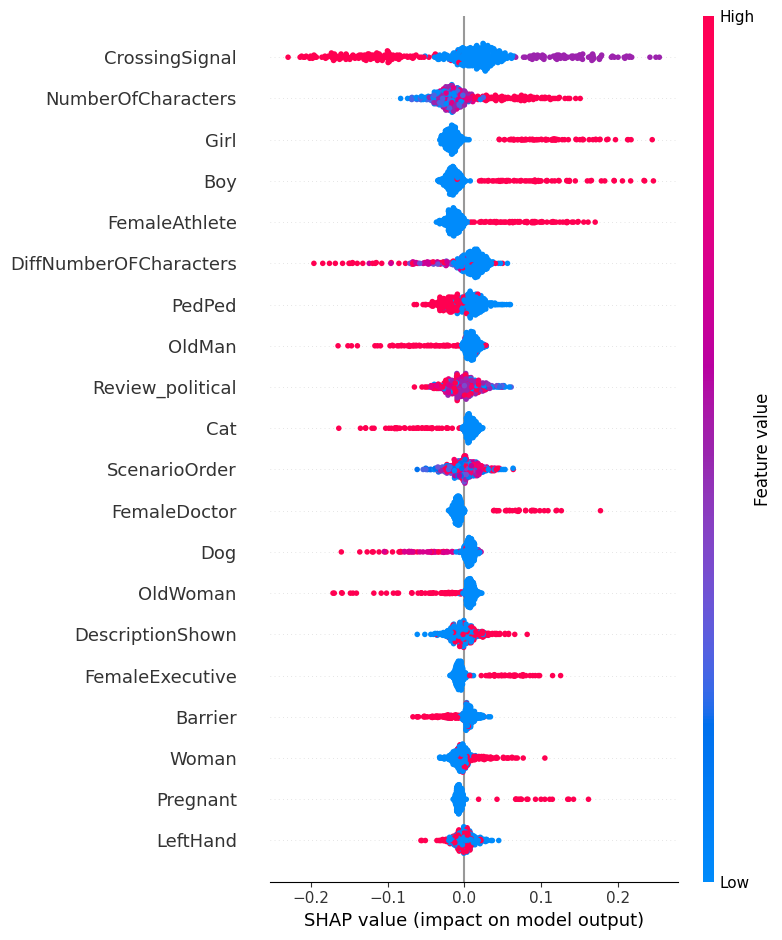

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


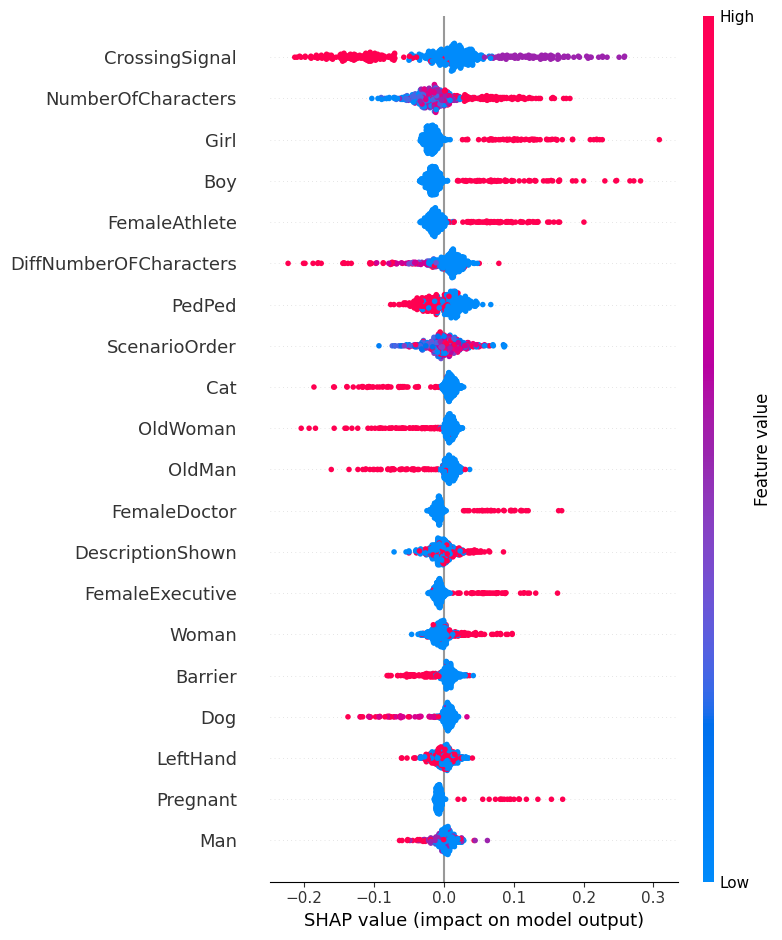

In [18]:
import shap
from sklearn.ensemble import RandomForestClassifier

df_x_combined_with_political = df_combined.iloc[:, 3:-2]
df_x_combined_without_political = df_combined.iloc[:, 3:-3]

df_x_combined_with_political = df_x_combined_with_political.drop(['Saved'], axis=1)
df_x_combined_without_political = df_x_combined_without_political.drop(['Saved'], axis=1)

df_x_combined_with_political = df_x_combined_with_political.apply(lambda x: pd.to_numeric(x, errors='coerce'))
df_x_combined_without_political = df_x_combined_without_political.apply(lambda x: pd.to_numeric(x, errors='coerce'))

df_x_combined_with_political = df_x_combined_with_political.replace([float('inf'), float('-inf')], float('nan'))
df_x_combined_without_political = df_x_combined_without_political.replace([float('inf'), float('-inf')], float('nan'))

df_x_combined_with_political = df_x_combined_with_political.apply(lambda x: x.clip(lower=-1e10, upper=1e10))
df_x_combined_without_political = df_x_combined_without_political.apply(lambda x: x.clip(lower=-1e10, upper=1e10))

df_x_combined_with_political = df_x_combined_with_political.dropna(axis=1)
df_x_combined_without_political = df_x_combined_without_political.dropna(axis=1)

x_train_with_political, x_test_with_political, y_train_with_political, y_test_with_political = train_test_split(df_x_combined_with_political, df_combined['Saved'], test_size=0.2, random_state=0)
x_train_without_political, x_test_without_political, y_train_without_political, y_test_without_political = train_test_split(df_x_combined_without_political, df_combined['Saved'], test_size=0.2, random_state=0)

rf_model_with_political = RandomForestClassifier()
rf_model_without_political = RandomForestClassifier()

rf_model_with_political.fit(x_train_with_political, y_train_with_political)
rf_model_without_political.fit(x_train_without_political, y_train_without_political)

explainer_with_political = shap.TreeExplainer(rf_model_with_political)
explainer_without_political = shap.TreeExplainer(rf_model_without_political)


# explainer = shap.Explainer(model_combined, x_train_combined)

# # Calculate SHAP values
# shap_values = explainer(x_test_combined, check_additivity=False)

# # print(type(shap_values))
# # print(shap_values.shape)

# # print(type(x_test_combined))
# # print(x_test_combined.shape)
# shap_values_positive_class = shap_values.values[...,1]

# # Now you can plot the summary plot for the positive class
# shap.summary_plot(shap_values_positive_class, x_test_combined)

shap_values_with_political = explainer_with_political.shap_values(x_test_with_political)
shap_values_without_political = explainer_without_political.shap_values(x_test_without_political)

# plot the SHAP values for the positive class
shap.summary_plot(shap_values_with_political[1], x_test_with_political)
shap.summary_plot(shap_values_without_political[1], x_test_without_political)

In [19]:
# feature importance
import pandas as pd

feature_importance_with_political = pd.DataFrame(rf_model_with_political.feature_importances_, index=x_train_with_political.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importance_without_political = pd.DataFrame(rf_model_without_political.feature_importances_, index=x_train_without_political.columns, columns=['importance']).sort_values('importance', ascending=False)

print(feature_importance_with_political)
print(feature_importance_without_political)

                        importance
ScenarioOrder             0.120564
Review_political          0.116476
NumberOfCharacters        0.073611
CrossingSignal            0.069447
DiffNumberOFCharacters    0.047759
Man                       0.035811
Woman                     0.033924
LeftHand                  0.033054
PedPed                    0.032654
DescriptionShown          0.032607
FemaleAthlete             0.028833
OldMan                    0.027813
Girl                      0.027811
MaleAthlete               0.027743
Boy                       0.027391
OldWoman                  0.025739
LargeMan                  0.024945
LargeWoman                0.021776
Cat                       0.021644
Dog                       0.020935
Barrier                   0.020390
MaleExecutive             0.019409
FemaleDoctor              0.018617
FemaleExecutive           0.018605
MaleDoctor                0.017755
Homeless                  0.016424
Pregnant                  0.014547
Criminal            

Decision Tree
0.6105476673427992
              precision    recall  f1-score   support

           0       0.63      0.65      0.64       262
           1       0.59      0.57      0.58       231

    accuracy                           0.61       493
   macro avg       0.61      0.61      0.61       493
weighted avg       0.61      0.61      0.61       493



No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


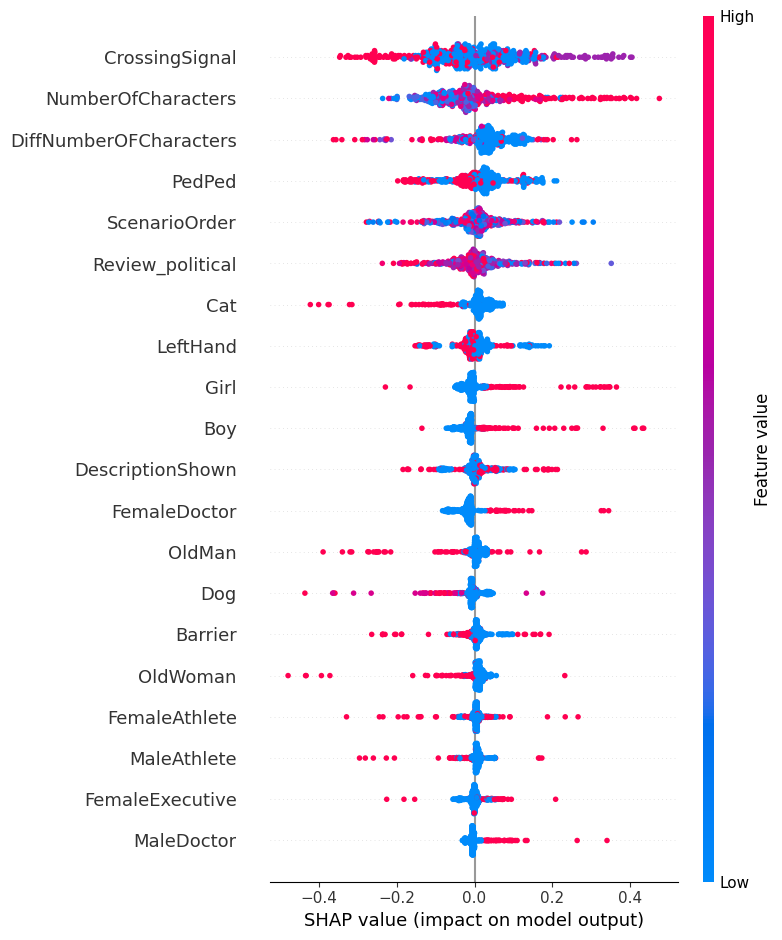

In [9]:
import shap
# decision tree
from sklearn.tree import DecisionTreeClassifier



df_x_combined = df_combined.iloc[:, 3:-2]
df_y_combined = df_combined['Saved']
df_x_combined = df_x_combined.drop(['Saved'], axis=1)
df_x_combined = df_x_combined.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# deal with inf and -inf
df_x_combined = df_x_combined.replace([float('inf'), float('-inf')], float('nan'))

# deal with too large values
df_x_combined = df_x_combined.apply(lambda x: x.clip(lower=-1e10, upper=1e10))
df_x_combined = df_x_combined.dropna(axis=1)

x_train_combined, x_test_combined, y_train_combined, y_test_combined = train_test_split(df_x_combined, df_y_combined, test_size=0.2, random_state=0)

model_combined = DecisionTreeClassifier()
model_combined.fit(x_train_combined, y_train_combined)

# print classification report
y_pred_combined = model_combined.predict(x_test_combined)
print('Decision Tree')
print(accuracy_score(y_test_combined, y_pred_combined))
print(classification_report(y_test_combined, y_pred_combined))

# Create a SHAP explainer

explainer = shap.Explainer(model_combined, x_train_combined)

# Calculate SHAP values
shap_values = explainer(x_test_combined, check_additivity=False)

# print(type(shap_values))
# print(shap_values.shape)

# print(type(x_test_combined))
# print(x_test_combined.shape)
shap_values_positive_class = shap_values.values[...,1]

# Now you can plot the summary plot for the positive class
shap.summary_plot(shap_values_positive_class, x_test_combined)
# shap.summary_plot(shap_values, x_test_combined)

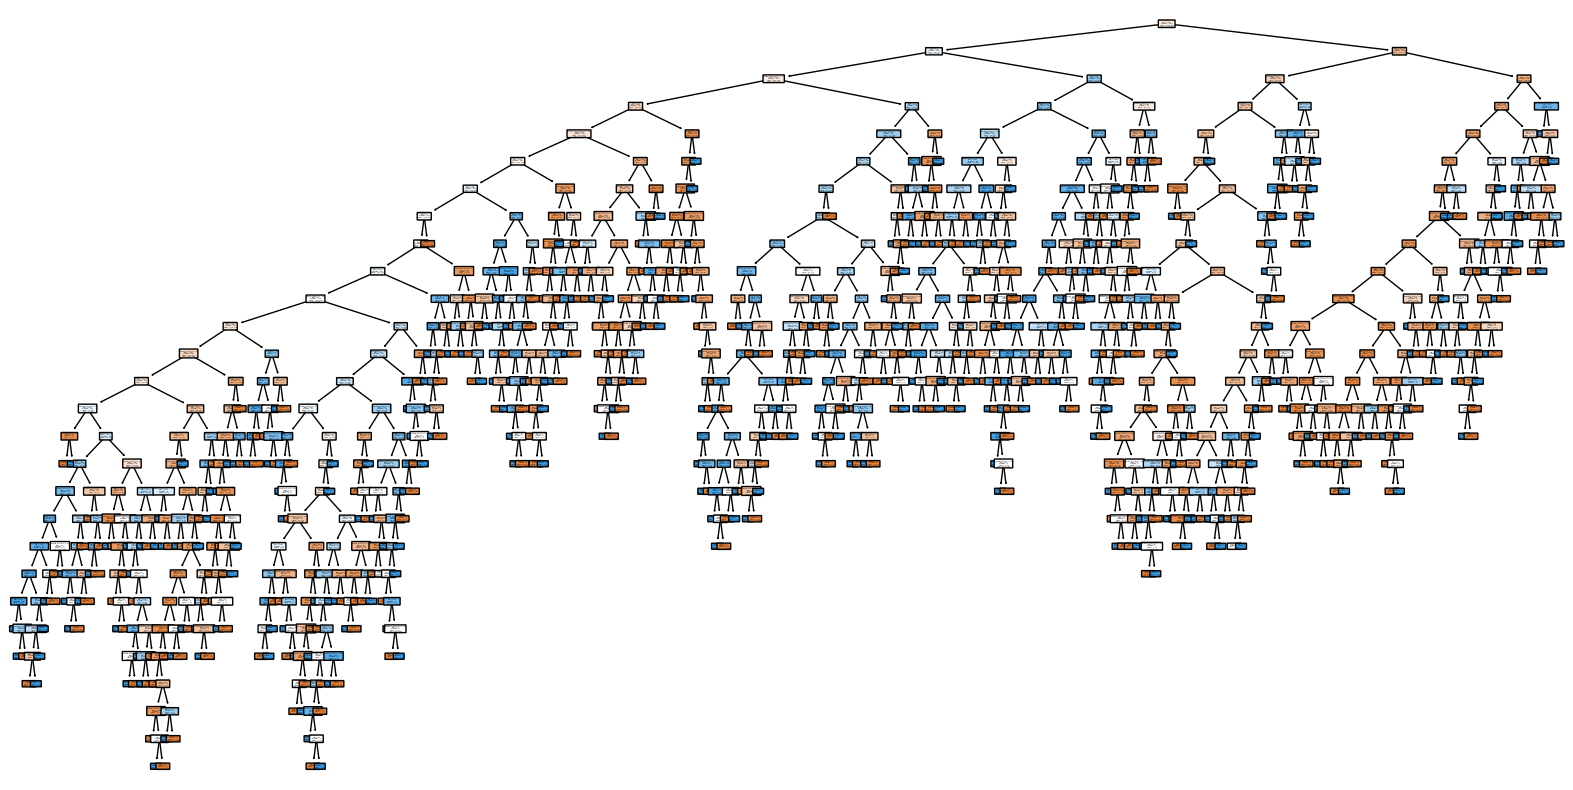

In [12]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(model_combined, filled=True, rounded=True, class_names=['Not Saved', 'Saved'], feature_names=df_x_combined.columns)
plt.show()

In [13]:
from sklearn.tree import export_text

tree_rules = export_text(model_combined, feature_names=list(df_x_combined.columns))
print(tree_rules)

|--- CrossingSignal <= 1.50
|   |--- CrossingSignal <= 0.50
|   |   |--- NumberOfCharacters <= 4.50
|   |   |   |--- Cat <= 0.50
|   |   |   |   |--- DiffNumberOFCharacters <= 0.50
|   |   |   |   |   |--- OldMan <= 0.50
|   |   |   |   |   |   |--- Girl <= 0.50
|   |   |   |   |   |   |   |--- OldWoman <= 1.50
|   |   |   |   |   |   |   |   |--- Dog <= 0.50
|   |   |   |   |   |   |   |   |   |--- MaleDoctor <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- DescriptionShown <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 17
|   |   |   |   |   |   |   |   |   |   |--- DescriptionShown >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 17
|   |   |   |   |   |   |   |   |   |--- MaleDoctor >  0.50
|   |   |   |   |   |   |   |   |   |   |--- ScenarioOrder <= 12.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |   |--- ScenarioOrder >  12.50
|   |   |

In [14]:
feature_importances = pd.DataFrame(model_combined.feature_importances_,
                                   index=df_x_combined.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

                        importance
Review_political          0.136412
ScenarioOrder             0.135277
NumberOfCharacters        0.094369
CrossingSignal            0.057910
DiffNumberOFCharacters    0.040776
Man                       0.038812
OldMan                    0.036516
LeftHand                  0.034006
Cat                       0.030649
OldWoman                  0.028442
FemaleAthlete             0.027355
PedPed                    0.027242
LargeMan                  0.026556
MaleAthlete               0.026022
Woman                     0.026018
Dog                       0.024340
Girl                      0.024046
Boy                       0.021483
DescriptionShown          0.021148
MaleExecutive             0.020718
Barrier                   0.018667
Homeless                  0.016300
FemaleExecutive           0.016178
LargeWoman                0.015400
MaleDoctor                0.014903
FemaleDoctor              0.012566
Pregnant                  0.010568
Stroller            

Decision Tree
0.5943204868154158
              precision    recall  f1-score   support

           0       0.62      0.63      0.62       262
           1       0.57      0.55      0.56       231

    accuracy                           0.59       493
   macro avg       0.59      0.59      0.59       493
weighted avg       0.59      0.59      0.59       493



No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


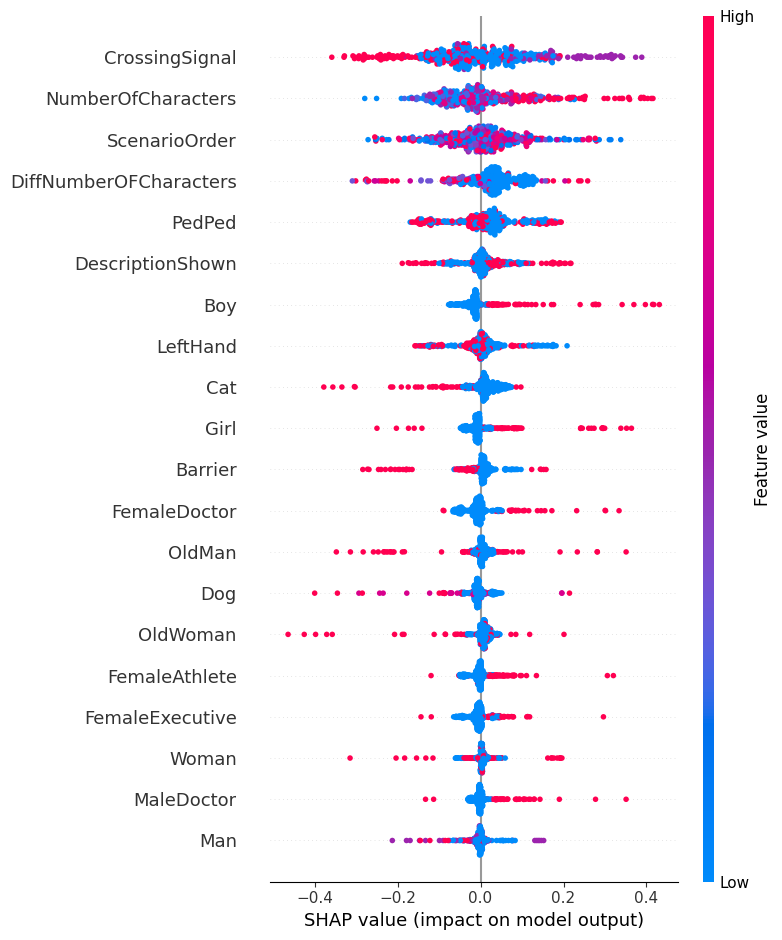

In [15]:
import shap
# decision tree
from sklearn.tree import DecisionTreeClassifier



df_x_combined = df_combined.iloc[:, 3:-3]
df_y_combined = df_combined['Saved']
df_x_combined = df_x_combined.drop(['Saved'], axis=1)
df_x_combined = df_x_combined.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# deal with inf and -inf
df_x_combined = df_x_combined.replace([float('inf'), float('-inf')], float('nan'))

# deal with too large values
df_x_combined = df_x_combined.apply(lambda x: x.clip(lower=-1e10, upper=1e10))
df_x_combined = df_x_combined.dropna(axis=1)

x_train_combined, x_test_combined, y_train_combined, y_test_combined = train_test_split(df_x_combined, df_y_combined, test_size=0.2, random_state=0)

model_combined = DecisionTreeClassifier()
model_combined.fit(x_train_combined, y_train_combined)

# print classification report
y_pred_combined = model_combined.predict(x_test_combined)
print('Decision Tree')
print(accuracy_score(y_test_combined, y_pred_combined))
print(classification_report(y_test_combined, y_pred_combined))

# Create a SHAP explainer

explainer = shap.Explainer(model_combined, x_train_combined)

# Calculate SHAP values
shap_values = explainer(x_test_combined, check_additivity=False)

# print(type(shap_values))
# print(shap_values.shape)

# print(type(x_test_combined))
# print(x_test_combined.shape)
shap_values_positive_class = shap_values.values[...,1]

# Now you can plot the summary plot for the positive class
shap.summary_plot(shap_values_positive_class, x_test_combined)

Random Forest
0.715311004784689
              precision    recall  f1-score   support

           0       0.71      0.76      0.74       219
           1       0.72      0.66      0.69       199

    accuracy                           0.72       418
   macro avg       0.72      0.71      0.71       418
weighted avg       0.72      0.72      0.71       418



100%|===================| 834/836 [00:29<00:00]        No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


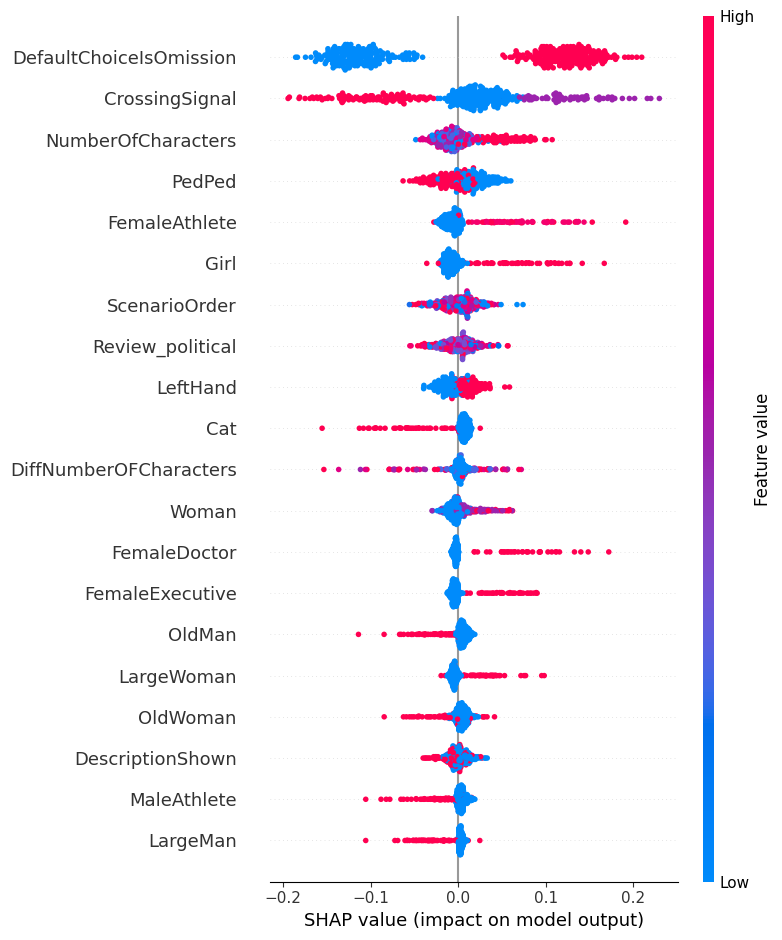

In [19]:
import shap

df_x_combined = df_combined.iloc[:, 3:-2]
df_y_combined = df_combined['Saved']
df_x_combined = df_x_combined.drop(['Saved'], axis=1)
df_x_combined = df_x_combined.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# deal with inf and -inf
df_x_combined = df_x_combined.replace([float('inf'), float('-inf')], float('nan'))

# deal with too large values
df_x_combined = df_x_combined.apply(lambda x: x.clip(lower=-1e10, upper=1e10))
df_x_combined = df_x_combined.dropna(axis=1)

x_train_combined, x_test_combined, y_train_combined, y_test_combined = train_test_split(df_x_combined, df_y_combined, test_size=0.2, random_state=0)

model_combined = RandomForestClassifier()
model_combined.fit(x_train_combined, y_train_combined)

# print classification report
y_pred_combined = model_combined.predict(x_test_combined)
print('Random Forest')
print(accuracy_score(y_test_combined, y_pred_combined))
print(classification_report(y_test_combined, y_pred_combined))

# Create a SHAP explainer

explainer = shap.Explainer(model_combined, x_train_combined)

# Calculate SHAP values
shap_values = explainer(x_test_combined, check_additivity=False)

# print(type(shap_values))
# print(shap_values.shape)

# print(type(x_test_combined))
# print(x_test_combined.shape)
shap_values_positive_class = shap_values.values[...,1]

# Now you can plot the summary plot for the positive class
shap.summary_plot(shap_values_positive_class, x_test_combined)
# shap.summary_plot(shap_values, x_test_combined)

Random Forest
0.7129186602870813
              precision    recall  f1-score   support

           0       0.72      0.75      0.73       219
           1       0.71      0.67      0.69       199

    accuracy                           0.71       418
   macro avg       0.71      0.71      0.71       418
weighted avg       0.71      0.71      0.71       418



 98%|===================| 818/836 [00:29<00:00]        No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


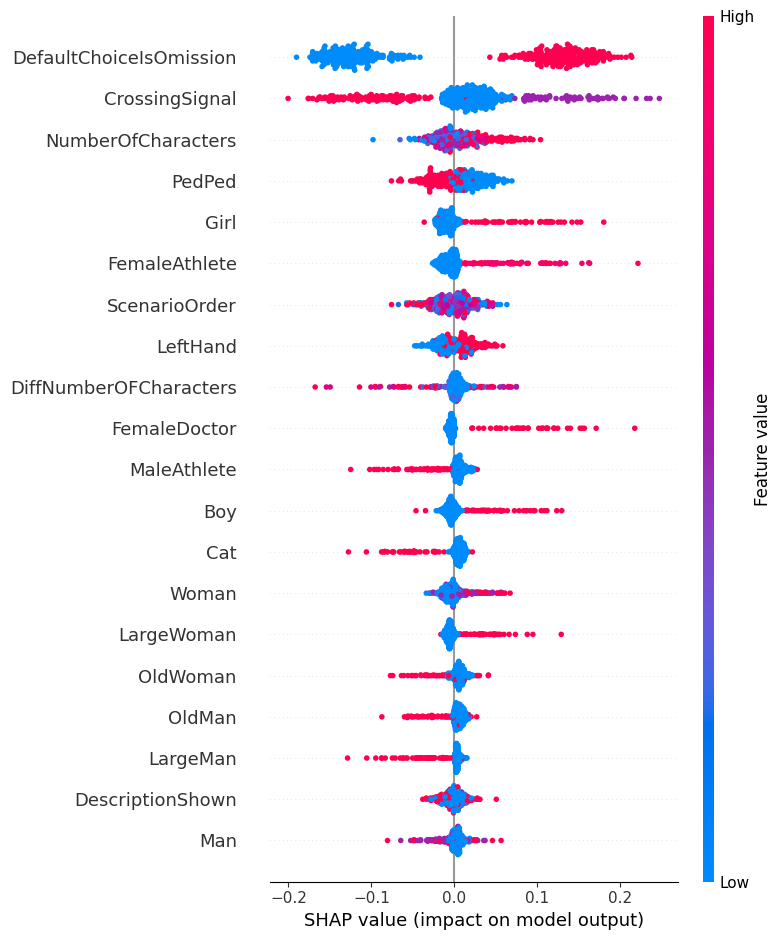

In [20]:
# drop column Review_political
df_x_combined = df_combined.iloc[:, 3:-3]
df_y_combined = df_x_combined['Saved']
df_x_combined = df_x_combined.drop(['Saved'], axis=1)
df_x_combined = df_x_combined.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# deal with inf and -inf
df_x_combined = df_x_combined.replace([float('inf'), float('-inf')], float('nan'))

# deal with too large values
df_x_combined = df_x_combined.apply(lambda x: x.clip(lower=-1e10, upper=1e10))
df_x_combined = df_x_combined.dropna(axis=1)


x_train_combined, x_test_combined, y_train_combined, y_test_combined = train_test_split(df_x_combined, df_y_combined, test_size=0.2, random_state=0)

model_combined = RandomForestClassifier()
model_combined.fit(x_train_combined, y_train_combined)

y_pred_combined = model_combined.predict(x_test_combined)
print('Random Forest')
print(accuracy_score(y_test_combined, y_pred_combined))
print(classification_report(y_test_combined, y_pred_combined))

# Create a SHAP explainer

explainer = shap.Explainer(model_combined, x_train_combined)

# Calculate SHAP values
shap_values = explainer(x_test_combined, check_additivity=False)

# print(type(shap_values))
# print(shap_values.shape)

# print(type(x_test_combined))
# print(x_test_combined.shape)
shap_values_positive_class = shap_values.values[...,1]

# Now you can plot the summary plot for the positive class
shap.summary_plot(shap_values_positive_class, x_test_combined)
# shap.summary_plot(shap_values, x_test_combined)

In [7]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

df_x_combined = df_combined.iloc[:, 3:-2]
df_y_combined = df_combined['Saved']
df_x_combined = df_x_combined.drop(['Saved'], axis=1)
df_x_combined = df_x_combined.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# deal with inf and -inf
df_x_combined = df_x_combined.replace([float('inf'), float('-inf')], float('nan'))

# deal with too large values
df_x_combined = df_x_combined.apply(lambda x: x.clip(lower=-1e10, upper=1e10))
df_x_combined = df_x_combined.dropna(axis=1)
df_x_without_review_political = df_x_combined.drop(['Review_political'], axis=1, errors='ignore')  # errors='ignore' allows smooth execution even if the column is absent

# Define the cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=0)

# Initialize the model
model_rf = RandomForestClassifier(random_state=0)

# Perform cross-validation for the dataset WITH "Review_political"
scores_with = cross_val_score(model_rf, df_x_combined, df_y_combined, cv=kf, scoring='accuracy')

# Perform cross-validation for the dataset WITHOUT "Review_political"
scores_without = cross_val_score(model_rf, df_x_without_review_political, df_y_combined, cv=kf, scoring='accuracy')

# Calculate and print the average accuracy
print(f"Average accuracy WITH 'Review_political': {np.mean(scores_with):.4f} ± {np.std(scores_with):.4f}")
print(f"Average accuracy WITHOUT 'Review_political': {np.mean(scores_without):.4f} ± {np.std(scores_without):.4f}")


Average accuracy WITH 'Review_political': 0.7114 ± 0.0233
Average accuracy WITHOUT 'Review_political': 0.6956 ± 0.0179


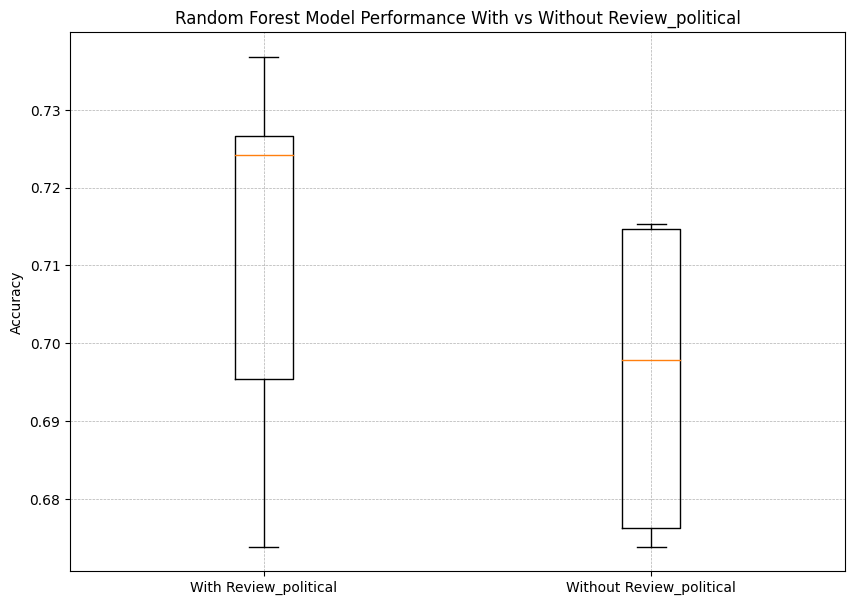

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))  # Adjust the figure size as needed
plt.boxplot([scores_with, scores_without], labels=['With Review_political', 'Without Review_political'])
plt.title('Random Forest Model Performance With vs Without Review_political')  # Title of the boxplot
plt.ylabel('Accuracy')  # Label for the y-axis
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Adding a grid for better readability
plt.show()  # Display the plot

In [14]:
from scipy.stats import shapiro, ttest_ind, mannwhitneyu

# Step 1: Normality Test
_, p_value_with = shapiro(scores_with)
_, p_value_without = shapiro(scores_without)

# Use alpha=0.05 to test for normality
alpha = 0.05
if p_value_with < alpha or p_value_without < alpha:
    print("At least one of the groups does not follow a normal distribution. Proceeding with Mann-Whitney U test.")
    # Step 2A: Mann-Whitney U test for non-normal distributions
    stat, p = mannwhitneyu(scores_with, scores_without)
else:
    print("Both groups follow a normal distribution. Proceeding with t-test.")
    # Step 2B: T-test for independent samples for normal distributions
    stat, p = ttest_ind(scores_with, scores_without)

# Print the result
if p < alpha:
    print(f"Statistically significant difference found (p = {p:.4f}).")
else:
    print(f"No statistically significant difference found (p = {p:.4f}).")

Both groups follow a normal distribution. Proceeding with t-test.
No statistically significant difference found (p = 0.3127).
